In [3]:
from sklearn import cluster, datasets, metrics
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print(iris_X.shape)
print(iris_X[0])
print(iris_y.shape)
print(np.unique(iris_y))

(150, 4)
[5.1 3.5 1.4 0.2]
(150,)
[0 1 2]


In [5]:
# KMeans 演算法
estimator = cluster.KMeans(n_clusters = 3)

kmeans_fit = estimator.fit(iris_X)

centroids = estimator.cluster_centers_
print('各个类别的聚类中心值:\n', centroids)
# 聚类中心均值向量的总和

inertia = estimator.inertia_
print('聚类中心均值向量的总和:\n', inertia)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果\n", cluster_labels)

# 印出品種看看
iris_y = iris.target
print("真實品種\n",iris_y)

# 印出績效
# 這個數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差。
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print("績效\n",silhouette_avg)

各个类别的聚类中心值:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
聚类中心均值向量的总和:
 78.85144142614601
分群結果
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
真實品種
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
績效
 0.5528190123564091


In [15]:
import pickle #pickle模块

#保存Model(注:save文件夹要预先建立，否则会报错)
with open('model/clf.pickle', 'wb') as f:
    pickle.dump(estimator, f)
    print('Saved Model')

#读取Model
with open('model/clf.pickle', 'rb') as f:
    estimator = pickle.load(f)
    #测试读取后的Model
    print(estimator.predict(iris_X[:10]))
    print('Restored Model')

Saved Model
[1 1 1 1 1 1 1 1 1 1]
Restored Model


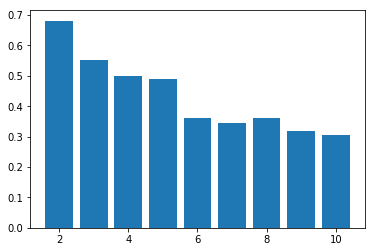

[0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3599431166074393, 0.34533309939974727, 0.3598224057544486, 0.3182000689883924, 0.3063030423294032]


In [19]:
# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

## Hierarchical Clustering

In [20]:
# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# Hierarchical Clustering 演算法
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)

# 印出分群結果
hclust.fit(iris_X)
cluster_labels = hclust.labels_
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print(iris_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# Hierarchical Clustering 演算法
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)

# 印出績效
hclust.fit(iris_X)
cluster_labels = hclust.labels_
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.5543236611296415
